## Importing Libraries

In [2]:
import mne 
from os.path import join
import matplotlib.pyplot as plt
import numpy as np 
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, permutation_test_score
from sklearn.inspection import permutation_importance

## Cleaning and Preprocessing

In [4]:
def read_raw_func(subject, date, raw_path, h_freq=40):
    
    recording_names = ['002.other_block1',
                       '004.other_block2',
                       '006.other_block3']
    
    raw_list = []

    for _, recording_name in enumerate(recording_names):
        fif_fname = recording_name[4:]
        full_path = join(raw_path, subject, date, 'MEG', recording_name,
                         'files', fif_fname + '.fif')
        print(full_path)
        raw = mne.io.read_raw(full_path, preload=True)
        raw.info["bads"] = ["MEG0422", "MEG1312"] # bad channels
        raw.filter(l_freq=None, h_freq=h_freq, n_jobs=3)

        raw_list.append(raw)

    return raw_list
    

In [5]:
raws = read_raw_func('0112', '20230927_000000', raw_path='/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/MEG_data', h_freq = 40)

/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/002.other_block1/files/other_block1.fif
Opening raw data file /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/002.other_block1/files/other_block1.fif...


/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_11653/193535920.py:14: RuntimeWarning: This filename (/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/002.other_block1/files/other_block1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(full_path, preload=True)


    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 141000 ... 521999 =    141.000 ...   521.999 secs
Ready.
Reading 0 ... 380999  =      0.000 ...   380.999 secs...
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 306 out of 306 | elapsed:    6.3s finished


/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/004.other_block2/files/other_block2.fif
Opening raw data file /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/004.other_block2/files/other_block2.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 61000 ... 439999 =     61.000 ...   439.999 secs
Ready.
Reading 0 ... 378999  =      0.000 ...   378.999 secs...


/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_11653/193535920.py:14: RuntimeWarning: This filename (/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/004.other_block2/files/other_block2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(full_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  69 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done 306 out of 306 | elapsed:    4.9s finished


/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/006.other_block3/files/other_block3.fif
Opening raw data file /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/006.other_block3/files/other_block3.fif...
    Read a total of 9 projection items:
        planar-Raw-0.000-120.000-PCA-01 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-02 (1 x 203)  idle
        planar-Raw-0.000-120.000-PCA-03 (1 x 203)  idle
        axial-Raw-0.000-120.000-PCA-01 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-02 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-03 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-04 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-05 (1 x 102)  idle
        axial-Raw-0.000-120.000-PCA-06 (1 x 102)  idle
    Range : 144000 ... 520999 =    144.000 ...   520.999 secs
Ready.
Reading 0 ... 376999  =      0.000 ...   376.999 secs...


/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_11653/193535920.py:14: RuntimeWarning: This filename (/Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/834761/0112/20230927_000000/MEG/006.other_block3/files/other_block3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw(full_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 s)



[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  69 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 306 out of 306 | elapsed:    5.3s finished


Fitting ICA to data using 304 channels (please be patient, this may take a while)


Selecting by number: 20 components
Fitting ICA took 33.2s.
Fitting ICA to data using 304 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 27.2s.
Fitting ICA to data using 304 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 25.1s.


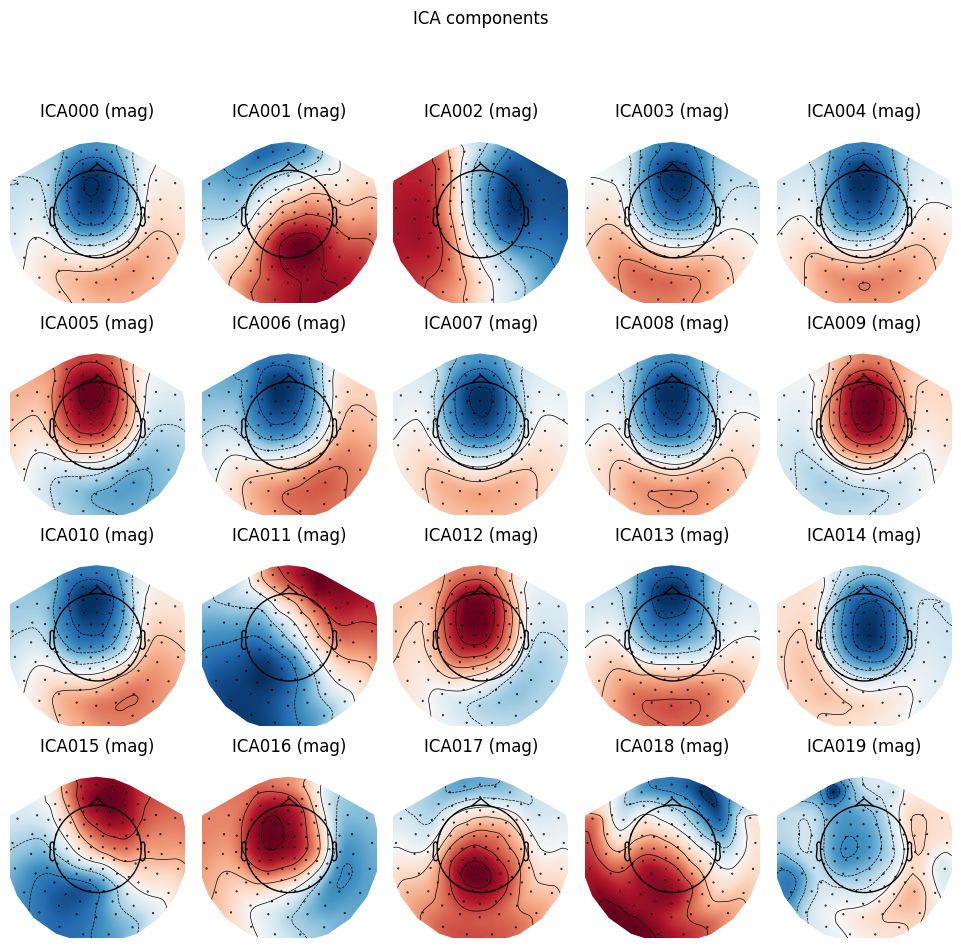

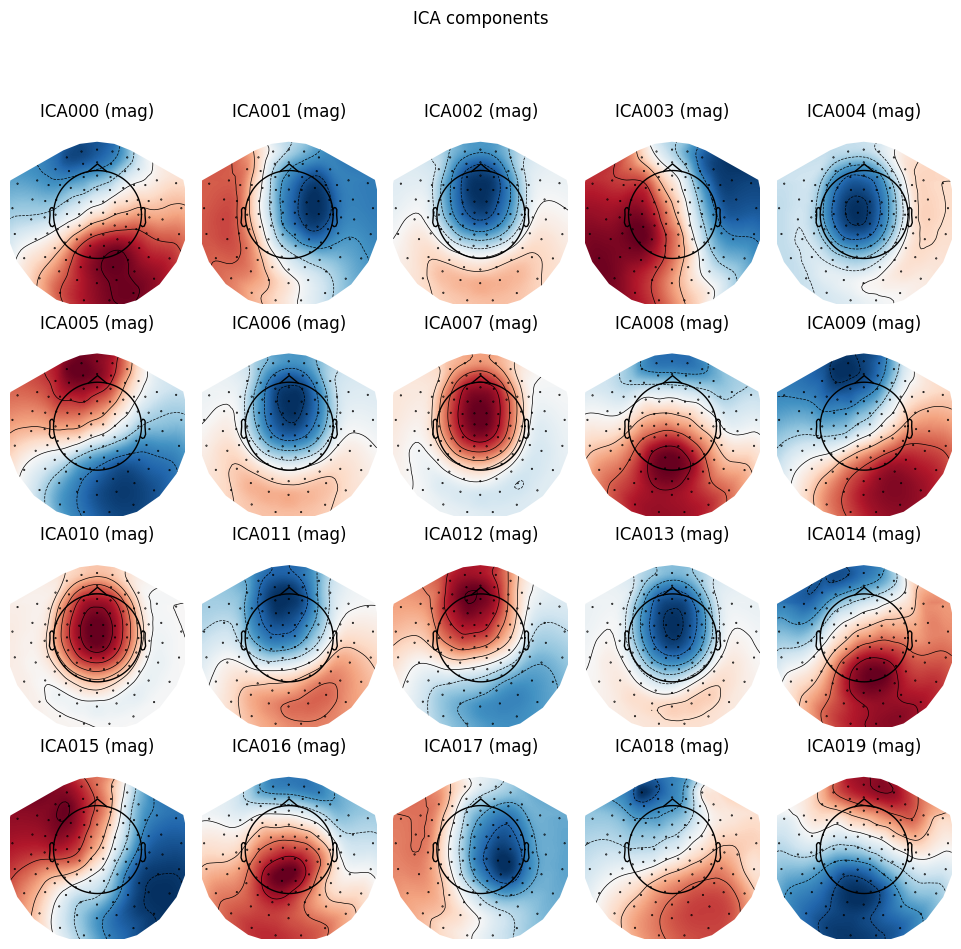

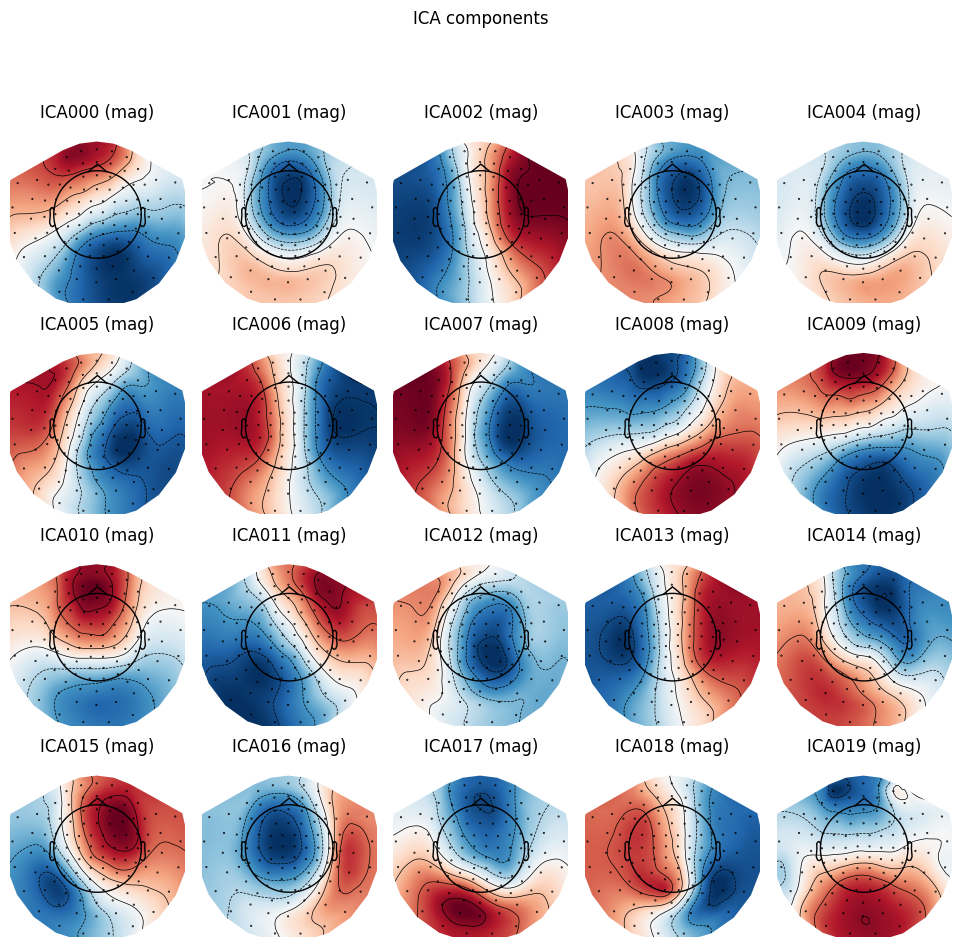

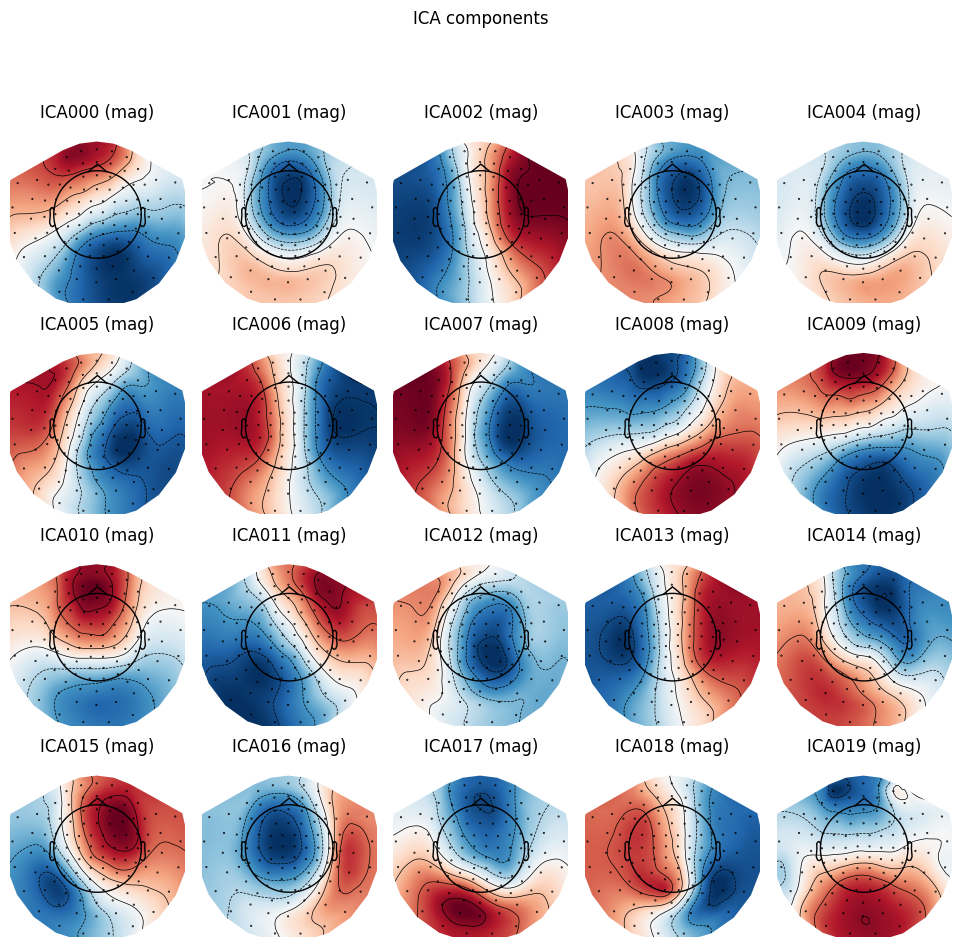

In [6]:
# set up and fit the ICA
ica_1 = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica_2 = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica_3 = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica_1.fit(raws[0])
ica_2.fit(raws[1])
ica_3.fit(raws[2])
ica_1.plot_components()
ica_2.plot_components()
ica_3.plot_components()

#raw.load_data()
#ica.apply(raw)

There does not seem to be any eyeblinks or heartrate affecting the data. So we will continue without removing any of the IC.

## Creating epochs

162 events found
Event IDs: [ 21  22  23 103 202]


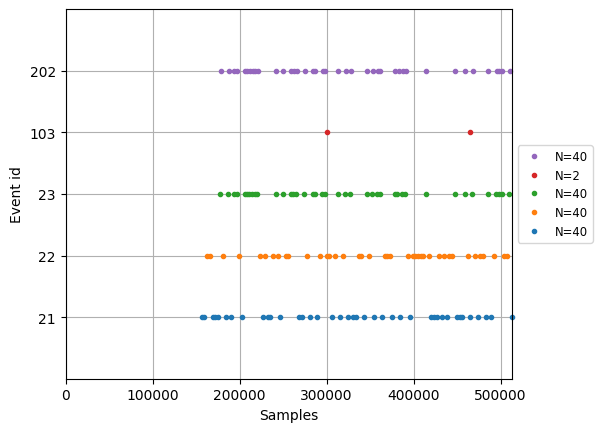

159 events found
Event IDs: [ 21  22  23 103 202]


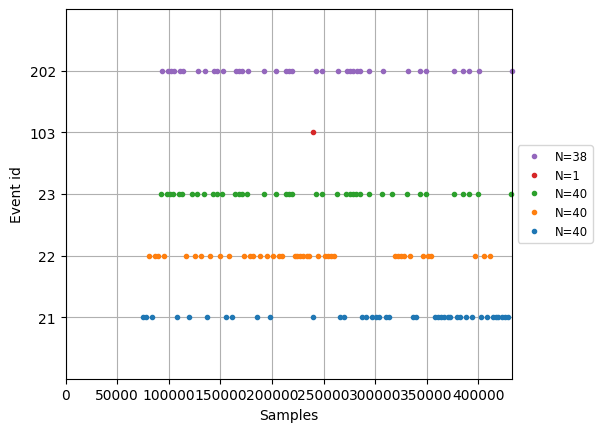

160 events found
Event IDs: [ 21  22  23 103 202]


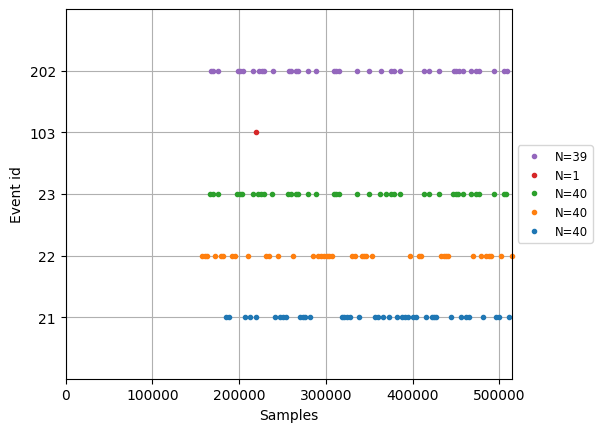

In [7]:
# can be used to look at events

for i in range(3):
    events = mne.find_events(raws[i], min_duration=0.002) ## returns a numpy array
    mne.viz.plot_events(events) ## samples on x-axis

In [8]:
def create_epochs_from_raw(raw,tmin=-0.200, tmax=1.000, baseline=(None, 0), reject=None, decim=4):
    
    recording_names = ['002.other_block1',
                       '004.other_block2',
                       '006.other_block3']
    
    epochs_list = list()
    for recording_index, recording_name in enumerate(recording_names):    
        events = mne.find_events(raws[recording_index], min_duration=0.002)
        if 'other' in recording_name: 
            event_id = dict(other_positive=21, other_negative=22,
                            button_press=23)
        else:
            raise NameError('Event codes are not coded for file')
        
        epochs = mne.Epochs(raws[recording_index], events, event_id, tmin, tmax, baseline,
                            preload=True, decim=decim, reject=reject, proj=True)
        epochs.pick_types(meg=True)
        
        epochs_list.append(epochs)
    
    return epochs_list

In [10]:
# creating epochs

epochs_list = create_epochs_from_raw(raws, tmin=-0.200, tmax=1.000, baseline=(None, 0), reject=dict(mag=4e-12, grad=4000e-13, eog=250e-6), decim=4)

162 events found
Event IDs: [ 21  22  23 103 202]
Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 9)
9 projection items activated
Using data from preloaded Raw for 120 events and 1201 original time points (prior to decimation) ...
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based on EOG : ['EOG001']
    Rejecting  epoch based o

In [191]:
# get indices of dropped epochs

# ignored_object =  epochs_list[0].drop_log[8]

# [n for n, dl in enumerate(epochs_list[0].drop_log) if len(dl) and dl != ignored_object]

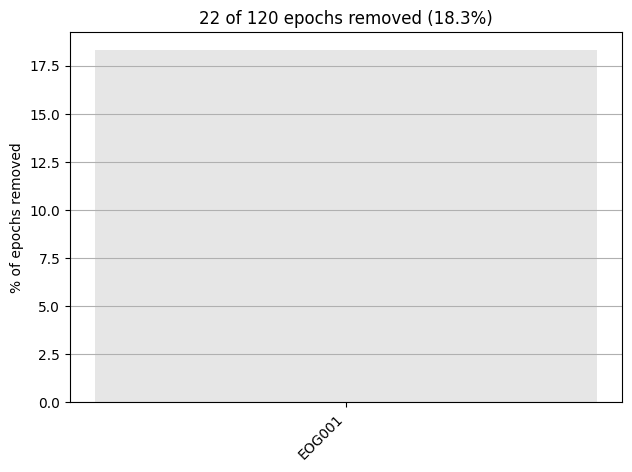

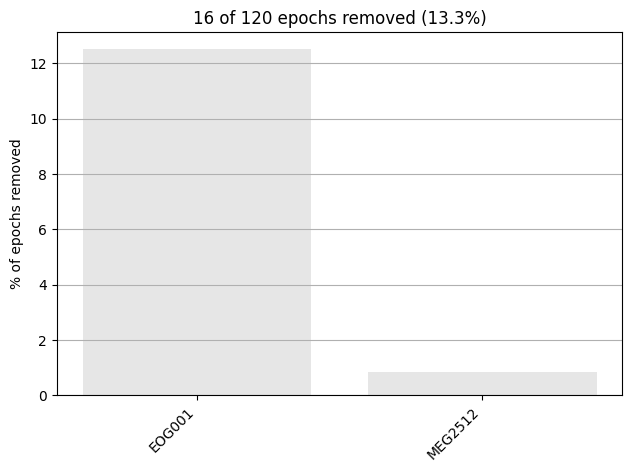

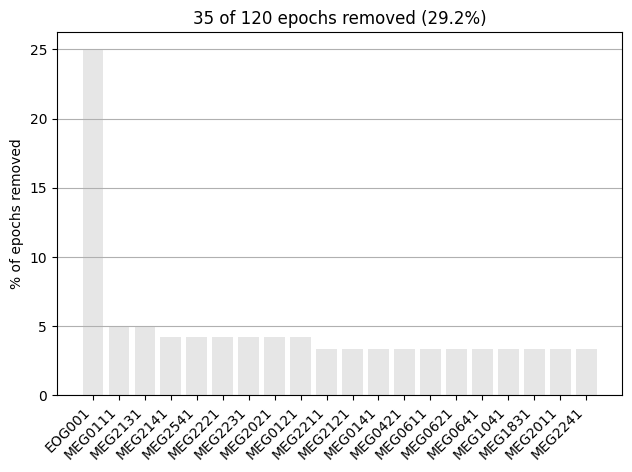

In [133]:
for i in range(3):
    fig = epochs_list[i].plot_drop_log()
    fig.savefig(f"../data/plots/rejeted_epochs_{i}.png", dpi=300)

From the first block 22 epochs was removed due to EOG1 channel. From the second block 15 epochs was removed due to EOG1 channel and 1 epoch was removed due to channel MEG2512. From the third block 30 epochs was removed due to EOG1 channel and 5 epoch was removed due to different MEG channels. By visual inspection none of the epochs were rejected.

## Forward Modeling

### Looking at the co-registration and source reconstruction

In [238]:
#%% SOURCE RECONSTRUCTION
meg_path = '/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/MEG_data/0112/20230927_000000/MEG/004.other_block2/files'
bem_path =  '/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer/0112/bem' 
subjects_dir = '/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer/'      
raw_name = 'other_block1.fif'
fwd_name = 'other_block1-oct-6-src-5120-fwd.fif'

#%% read forward solution
fwd = mne.read_forward_solution(join(bem_path, fwd_name))
src = fwd['src'] # where are the sources
trans = fwd['mri_head_t'] # what's the transformation between mri and head
info = epochs_list[1].info # where are the sensors?
bem_sol = fwd['sol'] # how do electric fields spread from the sources inside the head?
bem = join(bem_path, '0112-5120-bem.fif')

#%% plot source space
src.plot(trans=trans, subjects_dir=subjects_dir)
src.plot(trans=fwd['mri_head_t'], subjects_dir=subjects_dir, head=True,
         skull='inner_skull')
mne.viz.plot_alignment(info, trans=trans, subject='0112',
                       subjects_dir=subjects_dir, src=src,
                       bem=bem, dig=True, mri_fiducials=True)

Reading forward solution from /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/835482/0112/bem/other_block1-oct-6-src-5120-fwd.fif...
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8196 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
Using outer_skin.surf for head surface.
Loading BEM surfaces from /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/835482/0112/bem/0112-5120-bem.fif...
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Could not find the surface for head in the provided BEM model, looking in the subject directory.
Using outer_skin.surf for hea

### Function for actually doing source reconstruction

In [35]:
def preprocess_source_space_data(subject, subjects_dir, epochs_list,
                              method='MNE', lambda2=1, pick_ori='normal',
                              label=None):
    y = np.zeros(0)
    for epochs in epochs_list: # get y
        y = np.concatenate((y, epochs.events[:, 2]))
    
    if label is not None:
        label_path = join(subjects_dir, subject, 'label', label)
        label = mne.read_label(label_path)
        
    recording_names = ['002.other_block1',
                       '004.other_block2',
                       '006.other_block3']
    for epochs_index, epochs_i in enumerate(epochs_list): ## get X
        
        fwd_fname = recording_names[epochs_index][4:] + '-oct-6-src-' + \
                    '5120-fwd.fif'
        fwd = mne.read_forward_solution(join(subjects_dir,
                                             subject, 'bem', fwd_fname))
        noise_cov = mne.compute_covariance(epochs_i, tmax=0.000)
        inv = mne.minimum_norm.make_inverse_operator(epochs_i.info,
                                                     fwd, noise_cov)
  
        stcs = mne.minimum_norm.apply_inverse_epochs(epochs_i, inv, lambda2,
                                                     method, label,
                                                     pick_ori=pick_ori)

        for stc_index, stc in enumerate(stcs):
            this_data = stc.data
            if stc_index == 0:
                n_trials = len(stcs)
                n_vertices, n_samples = this_data.shape
                this_X = np.zeros(shape=(n_trials, n_vertices, n_samples))
            this_X[stc_index, :, :] = this_data
        if epochs_index == 0:
            X = this_X
        else:
            X = np.concatenate((X, this_X))
    return X, y


## Cluster based permutation tests

In [212]:
#%% SIMPLE CLASSIFICATION

def get_indices(y, triggers):
    indices = list()
    for trigger_index, trigger in enumerate(y):
        if trigger in triggers:
            indices.append(trigger_index)
            
    return indices

def equalize_number_of_indices(X, y): # write this yourself
    # np.unique(y, return_counts=True)

    rus = imblearn.under_sampling.RandomUnderSampler(sampling_strategy={21: 44, 22: 44, 23: 88},random_state=42)
    
    rus.fit_resample(X[:,:,0], y)
    
    X_balanced = X[rus.sample_indices_]
    y_balanced = y[rus.sample_indices_]
    y_balanced_new = np.array([21 if y_balanced[i] == 22 else y_balanced[i] for i in range(len(y_balanced))])
    return X_balanced, y_balanced, y_balanced_new

def simple_classication_permutation(X, y, triggers, penalty='none', C=1.0):
    
    n_features = X.shape[1]
    n_samples = X.shape[2]
    indices = get_indices(y, triggers)
    # equalize_number_of_indices()
    X = X[indices, :, :]
    y = y[indices]
    logr = LogisticRegression(penalty=penalty, C=C, solver='newton-cg')
    sc = StandardScaler() # especially necessary for sensor space as
                          ## magnetometers
                          # and gradiometers are on different scales 
                          ## (T and T/m)
    cv = StratifiedKFold()
    
    mean_scores = np.zeros(n_samples)
    n_permutations = 100
    feature_importance= np.zeros((n_features,n_samples))
    permutation_scores=np.zeros((n_samples,n_permutations))
    pvalues=np.zeros(n_samples)
    
    for sample_index in range(n_samples):
        this_X = X[:, :, sample_index]
        sc.fit(this_X)
        this_X_std = sc.transform(this_X)
        # scores = cross_val_score(logr, this_X_std, y, cv=cv)
        scores, permutation_score, pvalue= permutation_test_score(logr, this_X_std, y, cv=cv)
        logr.fit(this_X_std,y)
        importances = permutation_importance(logr, this_X_std, y)
        feature_importance[:,sample_index] = importances.importances_mean
        mean_scores[sample_index] = np.mean(scores)
        permutation_scores[sample_index,:]=permutation_score
        pvalues[sample_index] = pvalue
        if (sample_index % 10) == 0:
            print(sample_index)
        
    return mean_scores, permutation_scores, pvalues, feature_importance

def plot_classfication(times, mean_scores, title=None):

    plt.figure()
    plt.plot(times, mean_scores)
    plt.hlines(0.50, times[0], times[-1], linestyle='dashed', color='k')
    plt.ylabel('Proportion classified correctly')
    plt.xlabel('Time (s)')
    if title is None:
        pass
    else:
        plt.title(title)
    plt.show()

# plot function

def plot_permutation_func(times, classification_scores, permutation_scores, suptitle, title, file_name, level = 0.95):
    # Get the bottom and top percentiles of the permutation based on 'level'
    permutation_top=np.quantile(permutation_scores,1-((1-level)/2),axis=1)
    permutatio_bottom=np.quantile(permutation_scores,0+((1-level)/2),axis=1)

    plt.figure()
    plt.plot(times, classification_scores)
    plt.fill_between(times, permutatio_bottom,permutation_top,color="green", alpha=0.25)
    plt.hlines(0.50, times[0], times[-1], linestyle='dashed', color='k')
    plt.ylabel(f'Proportion classified correctly ({level*100}% perm. interval)')
    plt.xlabel('Time (s)')
    plt.suptitle(suptitle)
    plt.title(title, fontsize = 10)

    plt.savefig(f"../data/plots/MEG_InSpe_{file_name}.png", dpi=300)
    plt.show()

# Function that concatenates two labels and creates a new label that is the concatenation of the two
def concatenate_labels(subject, subjects_dir, label1, label2, new_label_name):
    # Paths
    label1_path = join(subjects_dir, subject, 'label', label1)
    label2_path = join(subjects_dir, subject, 'label', label2)
    # reading labels
    label1 = mne.read_label(label1_path)
    label2 = mne.read_label(label2_path)
    # concatenating labels
    new_label = label1 + label2
    # saving new label
    new_label.save(join(subjects_dir, subject, 'label', new_label_name))

times = epochs_list[0].times # get time points for later

### Brodmann Area 4

In [196]:
subjects_dir = '/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer/'

concatenate_labels('0112', 
                   subjects_dir, 
                   'rh.BA4a_exvivo.label',
                   'rh.BA4p_exvivo.label', 
                   'rh.BA4aBA4p_exvivo.label')

concatenate_labels('0112', 
                   subjects_dir, 
                   'lh.BA4a_exvivo.label',
                   'lh.BA4p_exvivo.label', 
                   'lh.BA4aBA4p_exvivo.label')

Saving label to : /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/835482/0112/label/rh.BA4aBA4p_exvivo.label


In [197]:
X_lh_BA4aBA4p, y = preprocess_source_space_data(subject='0112',
                                            subjects_dir='/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer',
                                            label='lh.BA4aBA4p_exvivo.label', 
                                            epochs_list=epochs_list) 

X_rh_BA4aBA4p, y = preprocess_source_space_data(subject='0112',
                                            subjects_dir='/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer',
                                            label='rh.BA4aBA4p_exvivo.label', 
                                            epochs_list=epochs_list) 

Reading forward solution from /Users/nielsaalundkrogsgaard/Downloads/MEG_stuff/835482/0112/bem/other_block1-oct-6-src-5120-fwd.fif...
    Reading a source space...
    Computing patch statistics...


    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read MEG forward solution (8196 sources, 306 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame
Computing rank from data with rank=None
    Using tolerance 2.8e-09 (2.2e-16 eps * 304 dim * 4.1e+04  max singular value)
    Estimated rank (mag + grad): 295
    MEG: rank 295 computed from 304 data channels with 9 projectors
    Created an SSP operator (subspace dimension = 9)
    Setting small MEG eigenvalues to zero (without PCA)
Reducing data rank from 304 -> 295
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 4998
[done]
Converting forward solution to surface orientation
    Average patch normals will be employed in the rota

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


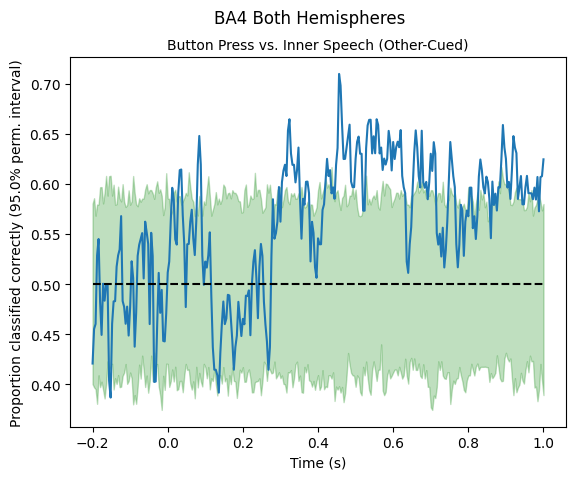

In [213]:
X_BA4aBA4p = np.concatenate((X_lh_BA4aBA4p, X_rh_BA4aBA4p), axis = 1)

X_BA4aBA4p_balanced, y_balanced, y_balanced_new = equalize_number_of_indices(X_BA4aBA4p, y)

other_vs_response_BA4aBA4p_rh_lh = simple_classication_permutation(X_BA4aBA4p_balanced,
                                  y_balanced_new, triggers=[21, 23],
                                  penalty='l2', C=1e-3)

plot_permutation_func(times, 
                      other_vs_response_BA4aBA4p_rh_lh[0], 
                      other_vs_response_BA4aBA4p_rh_lh[1], 
                      suptitle = "BA4 Both Hemispheres", 
                      title = "Button Press vs. Inner Speech (Other-Cued)", 
                      file_name = "ba4", 
                      level = 0.95)

In [118]:
print(f"Maximum classification accuracy: {np.max(other_vs_response_BA4aBA4p_rh_lh[0])}")
print(f"Maximum classification accuracy is happening at time {times[np.argmax(other_vs_response_BA4aBA4p_rh_lh[0])]}")
print(f"Percentage of accuracies with p-value below .05 (between 0.3 and 0.7 seconds): {np.sum(other_vs_response_BA4aBA4p_rh_lh[2][np.where(times==0.3)[0][0]:np.where(times==0.7)[0][0]]<0.05)/np.count_nonzero(other_vs_response_BA4aBA4p_rh_lh[2][np.where(times==0.3)[0][0]:np.where(times==0.7)[0][0]])}")
print(f"Percentage of accuracies with p-value below .05: {np.sum(other_vs_response_BA4aBA4p_rh_lh[2]<0.05)/np.count_nonzero(other_vs_response_BA4aBA4p_rh_lh[2])}")

0.7098412698412698
0.456


### Positive vs. Negative: Orbitofrontal Cortex

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

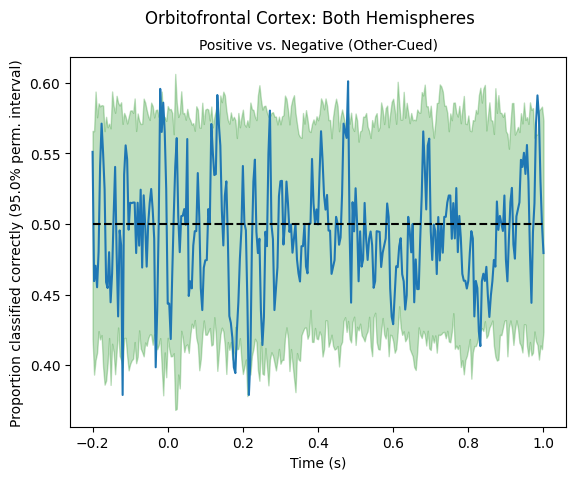

In [143]:
X_lh_orbitofrontal, y = preprocess_source_space_data(subject='0112',
                                            subjects_dir='/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer',
                                            label='lh.lateral_medial_orbitofrontal_exvivo.label', 
                                            epochs_list=epochs_list)  

X_rh_orbitofrontal, y = preprocess_source_space_data(subject='0112',
                                            subjects_dir='/Users/nielsaalundkrogsgaard/documents_local/MEG_Inner_Speech/data/Freesurfer',
                                            label='rh.lateral_medial_orbitofrontal_exvivo.label', 
                                            epochs_list=epochs_list)  

X_orbitofrontal = np.concatenate((X_lh_orbitofrontal, X_rh_orbitofrontal), axis = 1)

pos_vs_neg_orbitofrontal = simple_classication_permutation(X_orbitofrontal,
                                  y, triggers=[21, 22],
                                  penalty='l2', C=1e-3)

plot_permutation_func(times, 
                      pos_vs_neg_orbitofrontal[0], 
                      pos_vs_neg_orbitofrontal[1], 
                      suptitle = "Orbitofrontal Cortex: Both Hemispheres", 
                      title = "Positive vs. Negative (Other-Cued)", 
                      file_name = "orbitofrontal", 
                      level = 0.95)

In [174]:
print(f"Number of times accuracy has a p-value below .05: {len(times[np.where(pos_vs_neg_orbitofrontal[2]<0.05)])}")
print(f"Percentage of classifier p-values below .05: {np.sum(pos_vs_neg_orbitofrontal[2]<0.05)/np.count_nonzero(pos_vs_neg_orbitofrontal[2])}")

array([-0.02 , -0.012,  0.132,  0.136,  0.272,  0.468,  0.472,  0.476,
        0.48 ,  0.98 ,  0.984,  0.988])